<a href="https://colab.research.google.com/github/nubeljaz-spec/Loan-Acceptance-Classification-Model/blob/main/Loan_offer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Introduction*
# **Business Case: Optimizing Personal Loan Offer Strategy**

**Executive Summary**

The bank is facing a critical efficiency challenge in its personal loan marketing campaign. Although loan offers are widely promoted to customers, the majority of recipients do not accept the loan. This results in wasted resources, low conversion rates, and unnecessary advertising spend.

By leveraging the Bank Personal Loan Dataset, the bank can apply predictive modeling to identify which customers are most likely to accept a personal loan. This will allow the bank to target offers more precisely, reduce marketing waste, and improve loan uptake.


**Problem Statement**

Currently, the bank offers personal loans to all eligible customers through digital advertising campaigns. However, campaign results show that acceptance rates are low, which has two key implications:

1.   Low ROI on marketing spend – Most ad impressions and clicks do not result in conversions
2.   Customer dissatisfaction – Irrelevant offers may reduce trust and engagement with the bank’s products.

The challenge is to optimize who receives loan offers so that efforts are focused on customers with higher likelihood of acceptance.

**Expected Outcomes**

Conversion rate improvement: Loan acceptance rates expected to rise significantly (from low single digits to potentially 2–3x higher).

Cost efficiency: Reduction in digital marketing expenses by focusing on a smaller, high-likelihood audience.

Strategic alignment: Improved understanding of customer financial behaviors, enabling future product personalization beyond loans.

#Documentation – Bank Personal Loan Dataset

* Dataset title: anonymized loan applications USA_ETL
* Version: 1 (Published 25 June 2025)
* credit : Mendeley
* Rows: 5,000 customers
* Columns: 14 main features + engineered variables (optional)
* Target variable: Personal Loan (binary classification)





<table border="1" cellpadding="4" cellspacing="0">
  <tr>
    <th>Variable Name</th>
    <th>Type</th>
    <th>Description</th>
    <th>Values / Range</th>
  </tr>
  <tr>
    <td>ZIP_Code</td>
    <td>Categorical (Text)</td>
    <td>3-digit customer ZIP code region.</td>
    <td>901–966</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Integer</td>
    <td>Age of customer in years.</td>
    <td>≥ 0 (no negatives found)</td>
  </tr>
  <tr>
    <td>Experience</td>
    <td>Integer</td>
    <td>Years of professional experience.</td>
    <td>≥ 0</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Continuous</td>
    <td>Annual household income (in $1,000).</td>
    <td>≥ 0</td>
  </tr>
  <tr>
    <td>Family</td>
    <td>Integer</td>
    <td>Family size (number of dependents, including self).</td>
    <td>1 = Single, 2 = Couple (no children), 3 = Small family, 4 = Large family</td>
  </tr>
  <tr>
    <td>Education</td>
    <td>Integer (Ordinal)</td>
    <td>Education level of customer.</td>
    <td>1 = Undergrad, 2 = Graduate, 3 = Advanced</td>
  </tr>
  <tr>
    <td>Monthly_CC_Spend</td>
    <td>Continuous</td>
    <td>Average monthly spending on credit cards (in $1,000).</td>
    <td>≥ 0</td>
  </tr>
  <tr>
    <td>Mortgage</td>
    <td>Continuous</td>
    <td>Value of mortgage (in $1,000).</td>
    <td>≥ 0</td>
  </tr>
  <tr>
    <td>Securities_Acct</td>
    <td>Binary</td>
    <td>Whether customer has a securities account.</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>CD_Acct</td>
    <td>Binary</td>
    <td>Whether customer has a certificate of deposit account.</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>Online</td>
    <td>Binary</td>
    <td>Whether customer uses internet banking facilities.</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>CreditCard</td>
    <td>Binary</td>
    <td>Whether customer uses a bank-issued credit card.</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>Personal_Loan</td>
    <td>Target (Binary)</td>
    <td>Response variable: whether customer accepted the personal loan offer.</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
</table>


# **Exploratory Data Analysis**

# *Load all dependencies*

In [2]:
import requests
import pandas as pd
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,

# *Load data*

In [3]:
url = "https://data.mendeley.com/public-files/datasets/tx2v248cx4/files/935a1c7c-11a6-4da6-b2f8-e02cc3a20eac/file_downloaded"

# Add a "User-Agent" header to look like a browser
headers = {"User-Agent": "Mozilla/5.0"}

resp = requests.get(url, headers=headers)
resp.raise_for_status()  # will raise if not 200 OK

df = pd.read_csv(BytesIO(resp.content))
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# *Exploratory data analysis*

An initial exploratory data analysis (EDA) was performed to understand the distribution of customer demographics, financial indicators, and behavioral features. The primary focus was the target variable, Loan_Accepted, which indicates whether a customer accepted the personal loan offer. Early inspection shows that only a minority of customers accepted loans, confirming the imbalance between positive and negative classes. Key predictors such as income, education level, credit card spend, and account ownership appear to have strong relationships with loan acceptance. EDA also highlighted correlations among age, experience, and family size, providing insight into feature selection for predictive modeling.

# Descriptive statistics
 The dataset shows customers are typically middle-aged, with a mean age of 45 and experience averaging 20 years, though one anomaly reflects negative experience (-3). Income distribution is skewed right, with a median of USD 64,000 but some earning up to USD 224,000. Families average 2–3 members, capped at 4. Credit card spending (CCAvg) is generally low, median 1.5K/month, but highly skewed, with some spending up to 10,000. Overall, variables suggest moderate central tendencies but with noticeable outliers. Mortgage values are also skewed, with most customers having none, but some holding mortgages up to USD 635,000.

In [4]:
selected_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

descriptive_stats = df[selected_columns].agg(['mean', 'median', 'min', 'max', 'skew'])
descriptive_stats.loc['mode'] = df[selected_columns].mode().iloc[0]

display(descriptive_stats)

,Age,Experience,Income,Family,CCAvg,Mortgage
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800
median,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000
skew,-0.029341,-0.026325,0.841339,0.155221,1.598443,2.104002
mode,35.000000,32.000000,44.000000,1.000000,0.300000,0.000000


# Distribution
Overall class inbalance of the Personal Loan target variable.
Only ~9.6% of customers accepted a personal loan.
~90.4% rejected it.
This indicates a high class imbalance — which is important for model training (e.g., may require techniques like resampling, class weighting, or balanced metrics).

***Distribution of Personal Loan Acceptance by key variables***

Insights:
* Loan accepted customers (1) have significantly higher incomes.
* The median and overall spread of income are much higher compared to those who rejected the loan.
* This suggests that income may be a strong predictor of loan acceptance.
* Customers who accepted the loan (1) tend to have higher credit card usage than those who rejected it (0).
* The distribution for accepted customers is wider and more skewed to higher values, suggesting higher spending behavior.

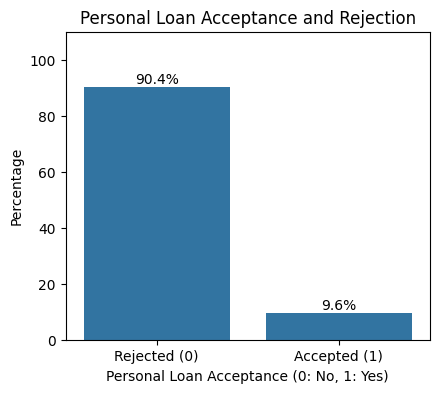

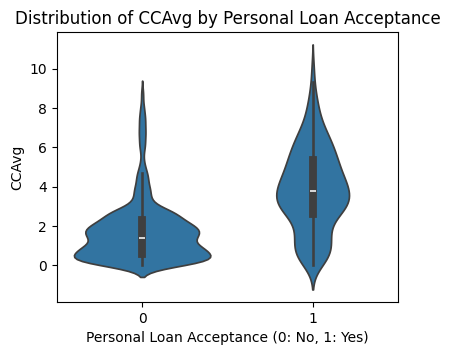

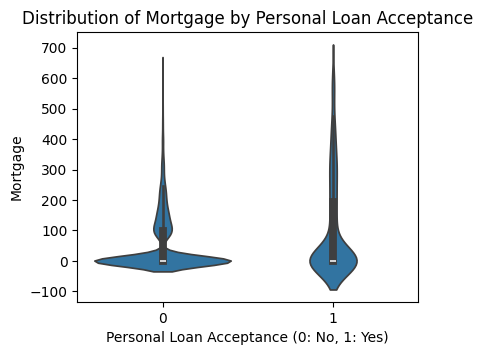

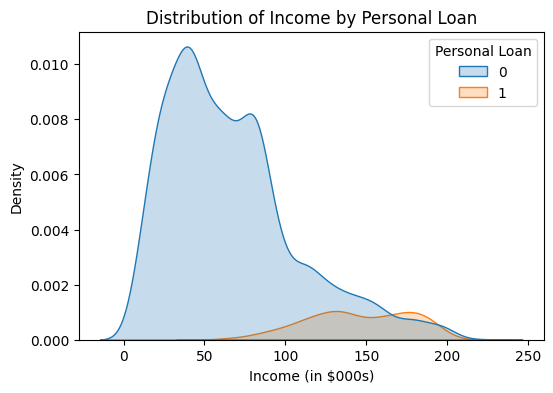

In [5]:
loan_counts = df['Personal Loan'].value_counts(normalize=True) * 100

plt.figure(figsize=(4.7, 4))
ax = sns.barplot(x=loan_counts.index, y=loan_counts.values)
plt.title('Personal Loan Acceptance and Rejection')
plt.xlabel('Personal Loan Acceptance (0: No, 1: Yes)')
plt.ylabel('Percentage')
plt.ylim(0, 110)
plt.xticks(ticks=[0, 1], labels=['Rejected (0)', 'Accepted (1)'])

ax.bar_label(ax.containers[0], fmt="%.1f%%")
plt.show()

other_cols = [ 'CCAvg', 'Mortgage']

for col in other_cols:
    plt.figure(figsize=(4.4, 3.5))
    sns.violinplot(x='Personal Loan', y=col, data=df)
    plt.title(f'Distribution of {col} by Personal Loan Acceptance')
    plt.xlabel('Personal Loan Acceptance (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.show()


plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Income', hue='Personal Loan', fill=True)
plt.title('Distribution of Income by Personal Loan')
plt.xlabel('Income (in $000s)')
plt.ylabel('Density')
plt.show()

# Feature Engineering

*Note: The data has already been cleaned and by its publisher hence no futher cleaning or manipulation is required.*



**One Hot Encoding**

In [6]:
data = df.copy()
# One-hot encode 'Education' column
education_mapping = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced_edu'}
data['Education'] = data['Education'].map(education_mapping)

family_mapping = {1: 'single', 2: 'couple', 3: 'small_family', 4: 'large_family'}
data['Family'] = data['Family'].map(family_mapping)

data_encoded = pd.get_dummies(data, columns=['Education', 'Family'], drop_first=False)
data_encoded = data_encoded.astype(int)
data_encoded.columns = [col.replace('Education_', '').replace('Family_', '') for col in data_encoded.columns]

# Standardize selected continuous variables
for col in ['Age', 'Experience', 'Income', 'Mortgage']:
    mean = data_encoded[col].mean()
    std = data_encoded[col].std()
    data_encoded[f"z_{col}"] = (data_encoded[col] - mean) / std

# Show the first few rows of the transformed data
data_encoded.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,...,Graduate,Undergrad,couple,large_family,single,small_family,z_Age,z_Experience,z_Income,z_Mortgage
0,1,25,1,49,91107,1,0,0,1,0,...,0,1,0,1,0,0,-1.774239,-1.665912,-0.538175,-0.555468
1,2,45,19,34,90089,1,0,0,1,0,...,0,1,0,0,0,1,-0.029521,-0.096321,-0.864023,-0.555468
2,3,39,15,11,94720,1,0,0,0,0,...,0,1,0,0,1,0,-0.552936,-0.445119,-1.363657,-0.555468
3,4,35,9,100,94112,2,0,0,0,0,...,1,0,0,0,1,0,-0.901880,-0.968316,0.569708,-0.555468
4,5,35,8,45,91330,1,0,0,0,0,...,1,0,0,1,0,0,-0.901880,-1.055515,-0.625068,-0.555468


# Multicolinearity

*Note: Considering that this dataset makes use of one hot encoded variables, these variables by default would produce an error when estimating the variance inflection point. To fix this, exclude one variable per class (Family or Education) before running the multicolinearity test, the excluded variable can be included in another run.*


Variance Inflation Factors:
               Feature        VIF
0                CCAvg   1.707532
1   Securities Account   1.138165
2           CD Account   1.337655
3               Online   1.040175
4           CreditCard   1.110304
5         Advanced_edu   1.496737
6            Undergrad   1.561909
7               couple   2.747148
8         large_family   2.429356
9               single   2.908258
10        small_family   2.080272
11               z_Age  94.191660
12        z_Experience  94.050675
13            z_Income   1.845485
14          z_Mortgage   1.052047


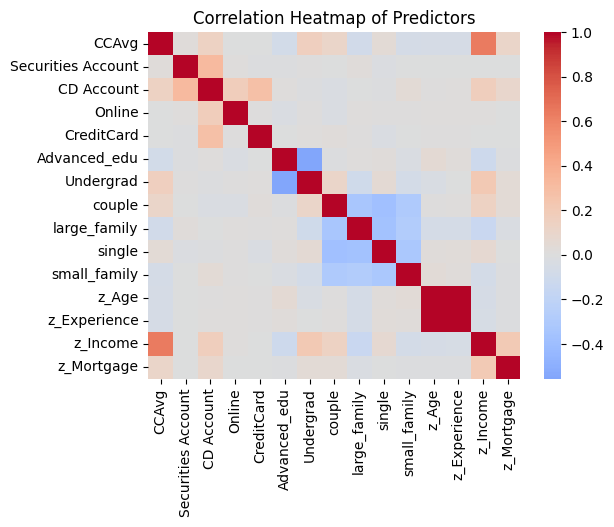

In [7]:
# Make a copy and drop irrelevant columns
df_vif = data_encoded.drop(columns=["ID", "ZIP Code",'Graduate'], errors="ignore")

# If both raw and z-score versions exist, keep z-scores
z_vars = ["z_Age", "z_Experience", "z_Income", "z_Mortgage"]
raw_vars = ["Age", "Experience", "Income", "Mortgage"]

# Drop raw if z-scores exist
for raw, z in zip(raw_vars, z_vars):
    if z in df_vif.columns and raw in df_vif.columns:
        df_vif = df_vif.drop(columns=[raw])

# Calculate VIF
X = df_vif.drop(columns=["Personal Loan"], errors="ignore")  # drop target if present
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors:")
print(vif_data)

# Correlation heatmap
plt.figure(figsize=(6,4.5))
corr = X.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Predictors", fontsize=12)
plt.show()


The VIF results show a high level of correlation between Age and Experience. These findings are intuitive and therefore not surprising as the older an individual is the higher their level of work experience.

**For the sake of our analysis we would drop Age from the dataset**

# **Machine Learnign Models**

# *1. Logistic regression*
To help the bank properly classify and predict which of its customers are more likely to accept a loan offer, we would begin by utilizing classifying algorithm, in this case a logistic regression.

**Considerations**
* Exclude variables that exhibit multicolinearity
* Unaccepted loan offers are over represented in our dataset (over 90%); to account for this inbalance we would train our machine learning model on a representative sample. Typically this can be done using `class weights = balanced` However this doesnt provide a representative sample rather it simply penalizes the model more for misclassifying the minority class so that the algorithm pays extra attention to it during training.
* **Solution:** Manually create a representative sample accounting for not more than 50% of the minority class. This ensures the model does not memorize the minority class variable.

# *Step 1*

Create the training dataset

In [12]:
# Split positives and negatives
positives = data_encoded[data_encoded['Personal Loan'] == 1]
negatives = data_encoded[data_encoded['Personal Loan'] == 0]

# Step 1: sample positives (≤ 45% of their class)
n_pos = int(0.45 * len(positives))
positives_sample = positives.sample(n=n_pos, random_state=42)

# Step 2: sample negatives (between 135% and 150% of chosen positives)
min_neg = int(1.35 * n_pos)
max_neg = int(1.50 * n_pos)
n_neg = np.random.randint(min_neg, max_neg + 1)
negatives_sample = negatives.sample(n=n_neg, random_state=42)

# Step 3: build subset
half_data_encoded = pd.concat([positives_sample, negatives_sample], axis=0).reset_index(drop=True)
half_data_encoded = half_data_encoded.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: build summary table
summary = pd.DataFrame({
    "Class": ["Positives (Loan=1)", "Negatives (Loan=0)"],
    "Sampled Count": [len(positives_sample), len(negatives_sample)],
    "Original Count": [len(positives), len(negatives)],
    "Percent of Original": [
        len(positives_sample) / len(positives) * 100,
        len(negatives_sample) / len(negatives) * 100
    ]
})

summary


,Class,Sampled Count,Original Count,Percent of Original
0,Positives (Loan=1),216,480,45.000000
1,Negatives (Loan=0),315,4520,6.969027


# *Step 2*

Fit the model
(at least one variable class subject to one-hot-encoding has been excluded from the regression; the final variable included are those that provided the best overall model)

In [32]:
feature_list = [
    'CCAvg',
    'Mortgage',
    'Securities Account',
    'CD Account',
    'Online',
    'CreditCard',
    'Advanced_edu',
    'Graduate',
    'couple',
    'large_family',
    'small_family',
    'z_Experience',
    'z_Income',
    'z_Mortgage'
]
# Explicitly list predictors
X = half_data_encoded[feature_list]

# Add constant term for intercept
X = sm.add_constant(X)

# Define target
y = half_data_encoded['Personal Loan']

# Fit logistic regression model with more iterations
logit_model = sm.Logit(y, X)
result = logit_model.fit(maxiter=100)

# Print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.193381
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                  531
Model:                          Logit   Df Residuals:                      517
Method:                           MLE   Df Model:                           13
Date:                Tue, 30 Sep 2025   Pseudo R-squ.:                  0.7138
Time:                        09:02:32   Log-Likelihood:                -102.69
converged:                       True   LL-Null:                       -358.78
Covariance Type:            nonrobust   LLR p-value:                3.773e-101
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.0395   2.89e+06  -1.74e-06      1.000   -5.67e+06    5.67e+06
CCAv

# *Analysis*

The logistic regression model was estimated on 531 observations and shows very strong performance, with a Pseudo R² of 0.71. In logistic regression, values above 0.2–0.4 are generally considered good, so 0.71 indicates an exceptionally strong fit. The log-likelihood improved substantially from -358.78 (null) to -102.69, and the likelihood ratio test was highly significant (p < 0.001), confirming that the model as a whole provides much more explanatory power than a model without predictors. The convergence status was successful, suggesting model stability. Taken together, these results imply that the model explains the data well and captures a large share of the variation in loan acceptance.



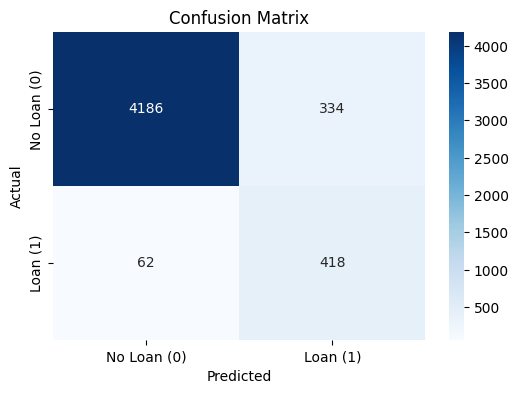

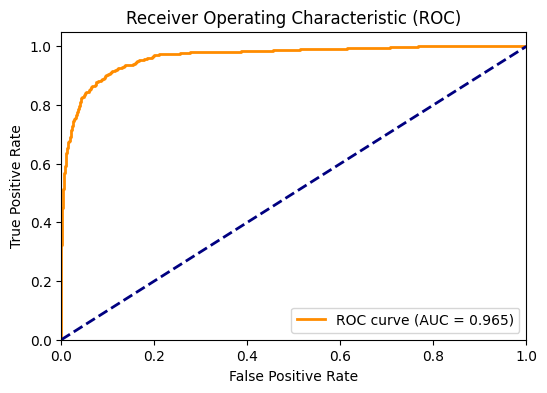

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.95      4520
           1       0.56      0.87      0.68       480

    accuracy                           0.92      5000
   macro avg       0.77      0.90      0.82      5000
weighted avg       0.94      0.92      0.93      5000



In [44]:
# --- Confusion Matrix as heatmap ---
cm = confusion_matrix(y_full, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Loan (0)', 'Loan (1)'],
            yticklabels=['No Loan (0)', 'Loan (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_full, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# --- Evaluation metrics ---
print("Classification Report:\n", classification_report)



# Model Evaluation and Business Impact

The logistic regression model delivers a nuanced performance.  

---

## Key Metrics

- **Accuracy: 92%**  
  High, but can be misleading due to class imbalance. Predicting “no” most of the time would also give high accuracy.  

- **Precision (Class 1 – Loan Takers): 0.56**  
  When the model predicts acceptance, it is right just over half the time. This reduces wasted outreach compared to random targeting.  

- **Recall (Class 1 – Loan Takers): 0.87**  
  Very strong. The model successfully identifies the majority of true loan-takers, minimizing opportunity cost.  

- **F1 Score (Class 1): 0.68**  
  Balances precision and recall, showing the model is effective at capturing the right customers without too many false alarms.  

- **AUC-ROC: 0.96**  
  Excellent discrimination between customers likely to accept and those unlikely to do so. Far above the 0.5 baseline.  

---

## Overall Interpretation

- The model is not perfect, but it **substantially reduces missed opportunities** by capturing most loan-takers (high recall).  
- Precision is moderate, meaning some marketing efforts will still be wasted, but far less than random outreach.  
- The high AUC score shows the model is very good at ranking customers by likelihood.  

---

## Business Impact

- **Reduced Opportunity Costs**: The company captures far more customers who would have accepted loans.  
- **Slightly Reduced Ad Spend**: Marketing can be directed at higher-probability customers, lowering wasted spend.  
- **Massive Win**: Even with precision below 0.6, the company now has a reliable, data-driven way to focus on the right customers.  


# *Randon Forest Classifier*



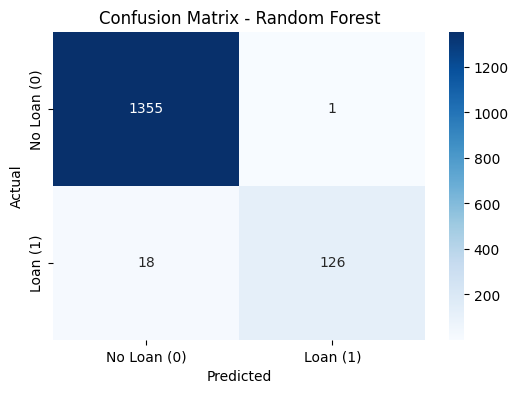

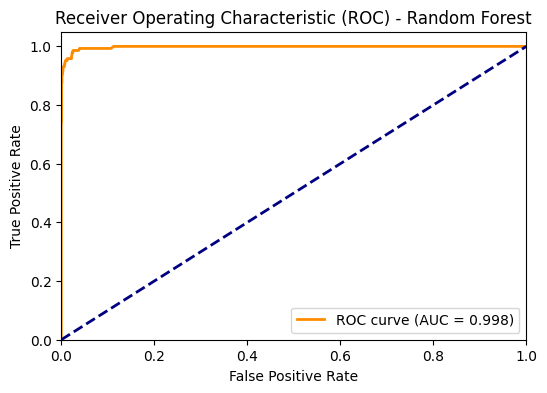

Classification Report:
               precision    recall  f1-score   support

           0     0.9869    0.9993    0.9930      1356
           1     0.9921    0.8750    0.9299       144

    accuracy                         0.9873      1500
   macro avg     0.9895    0.9371    0.9615      1500
weighted avg     0.9874    0.9873    0.9870      1500



In [51]:
roc_auc_score, roc_curve

# Define predictors (same as logistic regression)
X = data_encoded[feature_list]
y = data_encoded['Personal Loan']

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Random Forest with balanced class weights
rf = RandomForestClassifier(
    n_estimators=200,       # number of trees
    class_weight='balanced',
    random_state=42
)

# Fit the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# --- Confusion Matrix as heatmap ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Loan (0)', 'Loan (1)'],
            yticklabels=['No Loan (0)', 'Loan (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

# --- Classification Report ---
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))


# Model Evaluation and Business Impact

The **Random Forest model** demonstrates a significant leap in performance.

---

## Key Metrics

- **Accuracy:** **98.7%**  
  Much higher than logistic regression, reflecting strong classification ability across both classes.

- **Precision (Class 1 – Loan Takers):** **0.99**  
  Almost perfect. When the model predicts a customer will accept a loan, it is almost always correct.  
  → This drastically reduces wasted outreach.

- **Recall (Class 1 – Loan Takers):** **0.88**  
  Slightly lower than logistic regression, meaning a few potential accepters are missed.

- **F1 Score (Class 1):** **0.93**  
  A strong balance between very high precision and solid recall.

- **AUC-ROC:** **0.998**  
  Near-perfect discrimination. The model is excellent at ranking customers by acceptance likelihood.

---

## Overall Interpretation

- Random Forest achieves **superior accuracy and precision**, ensuring marketing efforts are far more targeted.  
- Recall remains strong, though slightly lower than logistic regression → a small fraction of accepters are still overlooked.  
- The very high **AUC confirms exceptional ranking power**.

---

## Business Impact

- **Substantially Reduced Opportunity Costs:** The model captures most true loan-takers with exceptional accuracy.  
- **Greatly Reduced Ad Spend:** Almost no wasted outreach, as predicted accepters are nearly always correct.  
- **🚀 Massive Win:** Random Forest surpasses the earlier model, giving the company a highly reliable tool for precise targeting.


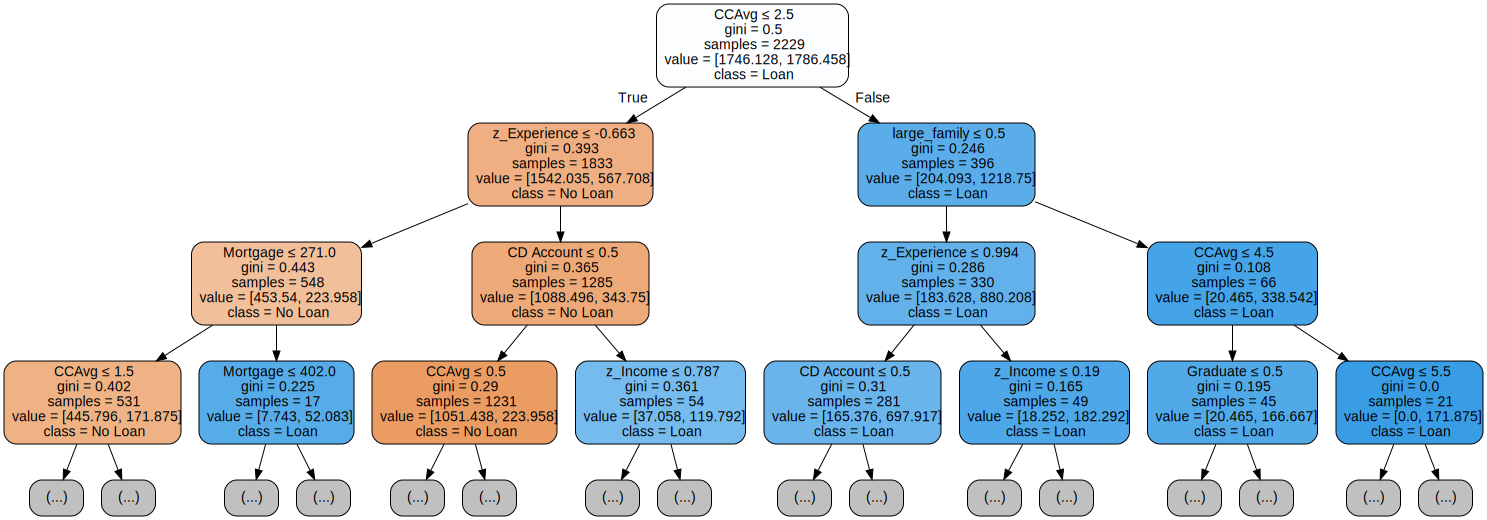

In [52]:
# Pick one tree from the forest
estimator = rf.estimators_[0]

# Export the tree structure to Graphviz format
dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Loan', 'Loan'],
    filled=True, rounded=True,
    special_characters=True,
    max_depth=3  # limit depth so it's readable
)

# Render the tree
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # saves to file
graph


# Model Comparison: Logistic Regression vs Random Forest

Both models were trained to **predict personal loan acceptance**.  
- Logistic Regression provided a strong baseline.  
- Random Forest significantly advanced performance, especially in **accuracy** and **precision**.  

----


**Key metrics**
<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th>Metric</th>
      <th>Logistic Regression</th>
      <th>Random Forest</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy</td>
      <td>92%</td>
      <td>98.7%</td>
    </tr>
    <tr>
      <td>Precision (Class 1)</td>
      <td>0.56</td>
      <td>0.99</td>
    </tr>
    <tr>
      <td>Recall (Class 1)</td>
      <td>0.87</td>
      <td>0.88</td>
    </tr>
    <tr>
      <td>F1 Score (Class 1)</td>
      <td>0.68</td>
      <td>0.93</td>
    </tr>
    <tr>
      <td>AUC-ROC</td>
      <td>0.96</td>
      <td>0.998</td>
    </tr>
  </tbody>
</table>


---

## Interpretation

- **Logistic Regression**  
  - Strong recall → captures most loan-takers.  
  - Weaker precision → led to wasted outreach.  

- **Random Forest**  
  - Much higher accuracy and precision → outreach is highly targeted.  
  - Strong recall → still captures most accepters.  

**Overall:** Random Forest is the clear winner, reducing both missed opportunities and wasted marketing spend.  

---

## Business Takeaway

The **Random Forest model** is a major improvement, offering the company a **reliable and efficient targeting tool**.  

It enables:  
- **Reduced Opportunity Costs:** Fewer missed accepters due to strong recall, capturing more potential revenue.  
- **Lower Ad Spend:** Higher precision directs marketing resources only at high-probability accepters.  
- **Better Strategic Decisions:** High AUC enables confident customer ranking → smarter targeting strategies.  
